# 1. Import All Required Packages

In [114]:
# Import libraries# Impor 
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

import keras

from keras.utils import np_utils

from keras import backend as K

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.preprocessing.image import ImageDataGenerator

# 2.Read Images from the data path

In [60]:
#Define Datapath
data_path = './jaffe/'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-.ipynb_checkpoints

Loaded the images of dataset-ANGRY

Loaded the images of dataset-DISGUST

Loaded the images of dataset-FEAR

Loaded the images of dataset-HAPPY

Loaded the images of dataset-NEUTRAL

Loaded the images of dataset-SAD

Loaded the images of dataset-SURPRISE



(213, 128, 128, 3)

# 3.Define the number of classes

In [61]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:29]=0 #30
labels[30:59]=1 #29
labels[60:92]=2 #32
labels[93:124]=3 #31
labels[125:155]=4 #30
labels[156:187]=5 #31
labels[188:]=6 #30

names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

def getLabel(id):
    return ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'][id]

# 4.Convert the class label to one-hot encoding

In [75]:
# convert class labels to on-hot encoding# conve 
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

# 5. CNN Layer Set

In [99]:
# Defining the model

input_shape=img_data[0].shape

model = Sequential()

# Feature Extraction
# model.add(Convolution2D(32,3,3, border_mode='same',input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(Convolution2D(32, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# model.add(Convolution2D(64, 3, 3))
# model.add(Activation('relu'))
# # model.add(Convolution2D(64, 3, 3))
# # model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# model.add(Convolution2D(128, 3, 3))
# model.add(Activation('relu'))
# # model.add(Convolution2D(128, 3, 3))
# # model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

#new Code
model.add(Convolution2D(6, 5, 5, input_shape=input_shape, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 5, 5, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(120, 5, 5))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Classification
# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

#Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

C:\Users\ashish.patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(128, 128,..., padding="same")`
C:\Users\ashish.patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same")`
C:\Users\ashish.patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(120, (5, 5))`


# 6.View Model Confifuration

In [100]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 128, 6)       456       
_________________________________________________________________
activation_21 (Activation)   (None, 128, 128, 6)       0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 6)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 16)        2416      
_________________________________________________________________
activation_22 (Activation)   (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 120)       48120     
__________

True

In [101]:
from keras import callbacks
filename='model_train_new.csv'
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

# 7. Train Model

In [104]:
# Training
hist = model.fit(X_train, y_train, batch_size=7, nb_epoch=30, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

C:\Users\ashish.patel\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 181 samples, validate on 32 samples
Epoch 1/30
181/181 [==============================] - 6s 35ms/step - loss: 0.2098 - acc: 0.9171 - val_loss: 0.4530 - val_acc: 0.9063
Epoch 2/30
181/181 [==============================] - 7s 36ms/step - loss: 0.2269 - acc: 0.9282 - val_loss: 0.3455 - val_acc: 0.8750
Epoch 3/30
181/181 [==============================] - 6s 35ms/step - loss: 0.2118 - acc: 0.9006 - val_loss: 0.4345 - val_acc: 0.9063
Epoch 4/30
181/181 [==============================] - 6s 35ms/step - loss: 0.1585 - acc: 0.9558 - val_loss: 0.4712 - val_acc: 0.8438
Epoch 5/30
181/181 [==============================] - 6s 35ms/step - loss: 0.1346 - acc: 0.9392 - val_loss: 0.4494 - val_acc: 0.9063
Epoch 6/30
181/181 [==============================] - 6s 34ms/step - loss: 0.1372 - acc: 0.9282 - val_loss: 0.5018 - val_acc: 0.8750
Epoch 7/30
181/181 [==============================] - 6s 35ms/step - loss: 0.1456 - acc: 0.9392 - val_loss: 0.4257 - val_acc: 0.8750
Epoch 8/30
181/181 [====

In [105]:
#Model Save
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

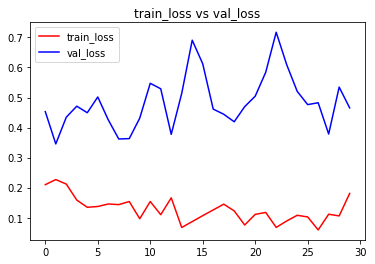

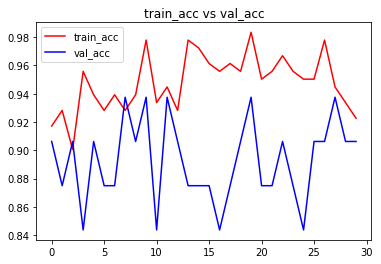

In [110]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

Test Loss: 0.4654931426048279
Test accuracy: 0.90625
(1, 128, 128, 3)
[[2.1821804e-09 8.9050531e-08 3.2704984e-06 1.3671537e-04 9.9984014e-01
  1.5250735e-05 4.4816770e-06]]
[4]
[[0. 0. 0. 0. 1. 0. 0.]]


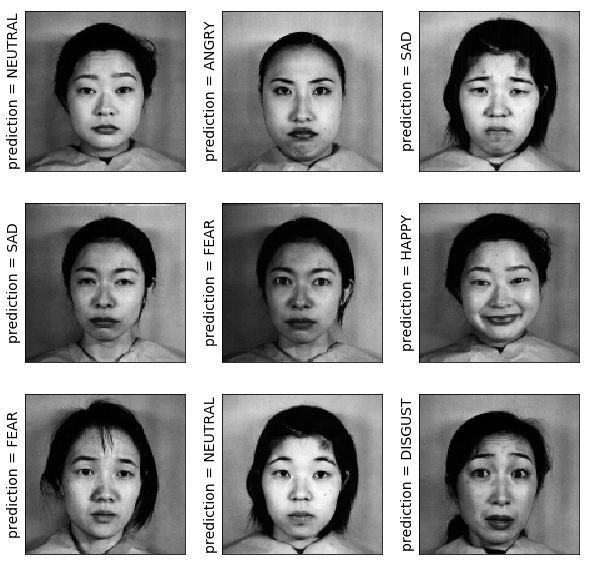

In [111]:
# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

res = model.predict_classes(X_test[:9])
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)
# show the plot
plt.show()


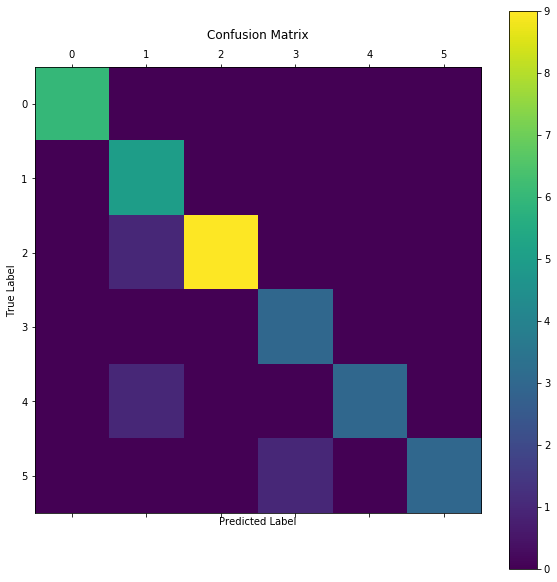

In [115]:
from sklearn.metrics import confusion_matrix
results = model.predict_classes(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

test image original shaape (128, 128, 3)
image original shaape (128, 128, 3)


Text(0.5,0,'prediction = SAD')

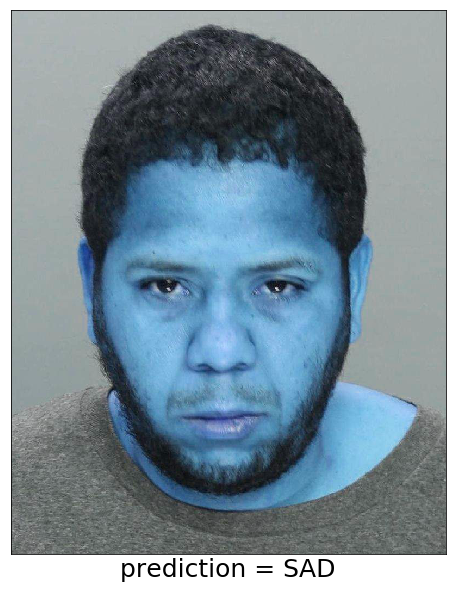

In [121]:
testimg_data_list=[]
test_img=cv2.imread('men.jpg', True)
    
test_img_resize=cv2.resize(test_img,(128,128))
testimg_data_list.append(test_img_resize)
testimg_data = np.array(testimg_data_list)
testimg_data = testimg_data.astype('float32')
testimg_data = testimg_data/255
testimg_data.shape

print("test image original shaape",testimg_data[0].shape)
print("image original shaape",img_data[0].shape)

results = model.predict_classes(testimg_data)
plt.imshow(test_img,cmap=plt.get_cmap('Set2'))
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.xlabel('prediction = %s' % getLabel(results[0]), fontsize=25)
